In [11]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.manifold import TSNE

In [12]:
embeddings = np.load("/u/scr/ethanchi/embeddings/en-sentences/embeddings.npy")
print(embeddings.shape)

labels = np.loadtxt("/u/scr/ethanchi/wordData/sentences.txt", delimiter="\t", dtype="str")
print(labels.shape)

(784, 25, 32)
(784, 2)


In [4]:
print(labels)
extract_verb = np.vectorize(lambda x: x.split()[2])
verbs = extract_verb(labels[:, 0])

[['The cat runs the cat' '0']
 ['The cat ran the cat' '1']
 ['The cat runs the dog' '0']
 ...
 ['The clock kissed the man' '1']
 ['The clock kisses the clock' '0']
 ['The clock kissed the clock' '1']]


In [16]:
pca = PCA(n_components=20)
transformed_data = pca.fit_transform(embeddings[:, 2])

In [13]:
tsne = TSNE(verbose=10)
tsne_data = tsne.fit_transform(embeddings[:, 2])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 784 samples in 0.003s...
[t-SNE] Computed neighbors for 784 samples in 0.055s...
[t-SNE] Computed conditional probabilities for sample 784 / 784
[t-SNE] Mean sigma: 0.147989
[t-SNE] Computed conditional probabilities in 0.139s
[t-SNE] Iteration 50: error = 51.8770981, gradient norm = 0.3972368 (50 iterations in 0.279s)
[t-SNE] Iteration 100: error = 45.4426422, gradient norm = 0.3695247 (50 iterations in 0.170s)
[t-SNE] Iteration 150: error = 44.2172775, gradient norm = 0.3595708 (50 iterations in 0.170s)
[t-SNE] Iteration 200: error = 43.6099472, gradient norm = 0.3611114 (50 iterations in 0.162s)
[t-SNE] Iteration 250: error = 42.3778381, gradient norm = 0.3621322 (50 iterations in 0.154s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.377838
[t-SNE] Iteration 300: error = 0.3181690, gradient norm = 0.0009595 (50 iterations in 0.142s)
[t-SNE] Iteration 350: error = 0.2228396, gradient norm = 0.0004093 (

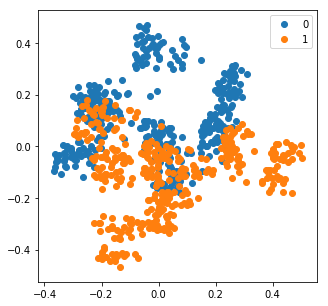

In [17]:
plt.figure(figsize=(5, 5))

for tense in ('0', '1'):
  plt.scatter(transformed_data[labels[:, 1] == tense][:, 0], transformed_data[labels[:, 1] == tense][:, 1], label=tense)

plt.legend()
    
plt.show()

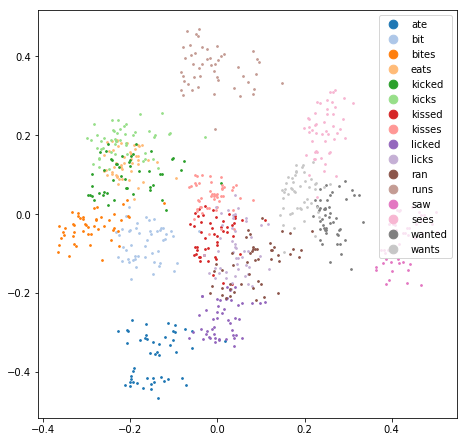

In [18]:
fig = plt.figure(figsize=(7.5, 7.5))

verblist = sorted(list(set(verbs)))
plt.set_cmap('rainbow')

NUM_COLORS = len(verblist)

cm = plt.get_cmap('tab20')
ax = fig.add_subplot(111)
ax.set_prop_cycle("color", [cm(1.*i/20) for i in range(20)])

for idx, verb in enumerate(verblist):
  ax.scatter(transformed_data[verbs == verb][:, 0], transformed_data[verbs == verb][:, 1], label=verb, s=3)

plt.legend(markerscale=5)
    
plt.show()